In [5]:
from geonamescache import GeonamesCache
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

gc = GeonamesCache()

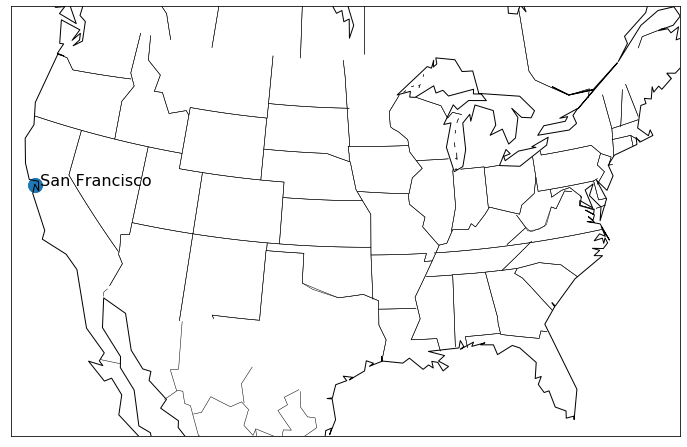

In [6]:
best_sf = max(gc.get_cities_by_name('San Francisco'),
              key=lambda x: list(x.values())[0]['population'])
sf_data = list(best_sf.values())[0]
sf_lat = sf_data['latitude']
sf_lon = sf_data['longitude']

fig = plt.figure(figsize=(12, 8))
map_lcc = Basemap(projection='lcc', lon_0=-95, llcrnrlon=-119,
                  llcrnrlat=22, urcrnrlon=-64, urcrnrlat=49, lat_1=33,
                  lat_2=45)
map_lcc.scatter([sf_lon], [sf_lat], latlon=True, s=200)
map_lcc.drawcoastlines()
map_lcc.drawstates()

x, y = map_lcc(sf_lon, sf_lat)
plt.text(x, y, ' San Francisco', fontsize=16)
plt.show()

In [7]:
gc.get_cities_by_name('Geneve')

[]

In [13]:
cities = set()
for city in gc.get_cities().values():
    cities.add(city['name'])
    

In [24]:
from unidecode import unidecode

city_dict = {}
for city in cities:
    best_city = list(max(gc.get_cities_by_name(city), key=lambda x: list(x.values())[0]['population']).values())[0]
    city_dict[unidecode(city)] = {
        'name': unidecode(best_city['name']),
        'latitude': best_city['latitude'],
        'longitude': best_city['longitude'],
        'countrycode': best_city['countrycode']
    }

In [25]:
print(len(cities))
print(len(city_dict))

23090
23022


In [29]:
print(city_dict['Geneve']['latitude'])

46.20222
